In [44]:
import sounddevice as sd
from scipy.io.wavfile import write
import matplotlib.pyplot as plt
import librosa.display
import IPython.display as ipd
import numpy as np
from scipy.io import wavfile 
from scipy import signal
from scipy.signal import hamming,firwin

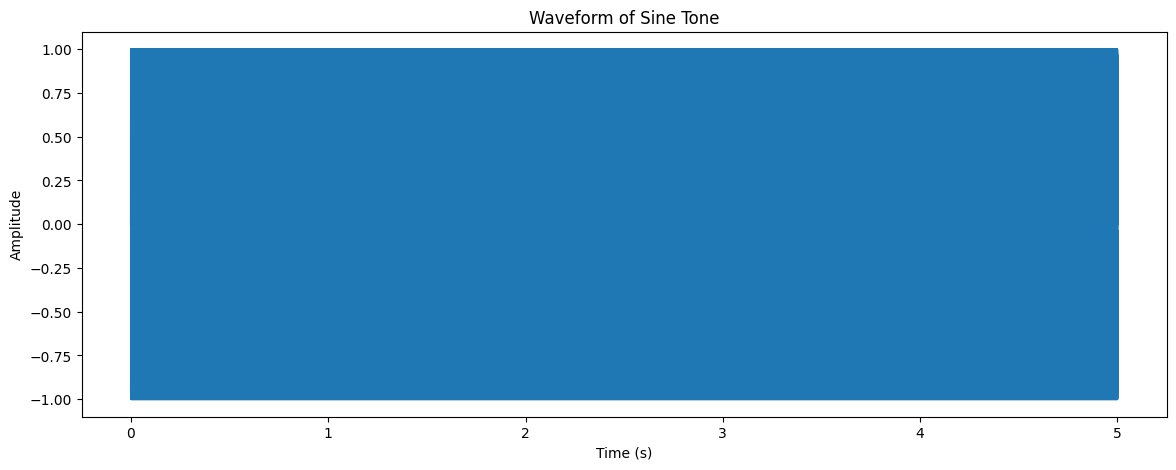

In [45]:
#2. Sine Tone Generation

SAMPLE_RATE = 44100  # Hertz
DURATION = 5  # Seconds

def generate_sine_wave(freq, sample_rate, duration):
    x = np.linspace(0, duration, sample_rate * duration)
    frequencies = x * freq
    # 2pi because np.sin takes radians
    y = np.sin((2 * np.pi) * frequencies)
    return x, y

# Generate a 5000 hertz sine wave that lasts for 5 seconds
x, y = (generate_sine_wave(5000, SAMPLE_RATE, DURATION))
plt.figure(figsize=(14, 5))
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Waveform of Sine Tone')
plt.plot(x, y)
plt.show()





In [46]:
wavfile.write(r"C:\Users\jlkbo\Documents\ECE\2312\Project 2\TeamJKBandJTM-sinetone.wav",SAMPLE_RATE,np.float32(y))
ipd.Audio(x, 'TeamJKBandJTM-sinetone.wav', rate=SAMPLE_RATE) # load a NumPy array

(1025, 431)


Text(0.5, 1.0, 'Spectrogram of Sine Tone')

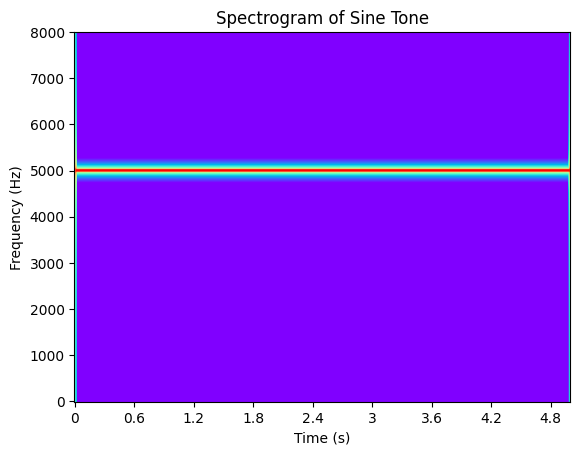

In [47]:
freq = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
print(freq.shape)
librosa.display.specshow(freq, y_axis='linear', x_axis='time', sr=SAMPLE_RATE, cmap ='rainbow')
plt.axis(ymax=8000)
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Spectrogram of Sine Tone')

(220500,)


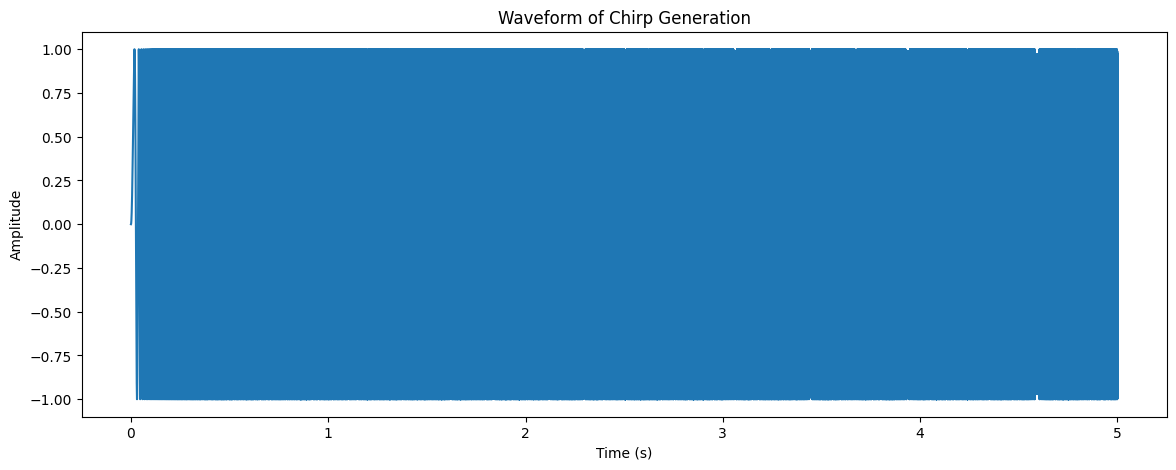

In [48]:
#3. Chirp Signal Generation

SAMPLE_RATE = 44100  # Hertz
DURATION = 5  # Seconds

def generate_chirp(max_freq, sample_rate, duration):
    x = np.linspace(0, duration, sample_rate * duration)
    frequencies = (x * max_freq) / duration
    # 2pi because np.sin takes radians
    y = np.sin((np.pi) * frequencies*x)
    print(frequencies.shape)
    return x, y

x, y= (generate_chirp(8000, SAMPLE_RATE, DURATION))
plt.figure(figsize=(14, 5))
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Waveform of Chirp Generation')
plt.plot(x,y)
plt.show()

In [49]:
y_norm = np.float32(y)
wavfile.write(r"C:\Users\jlkbo\Documents\ECE\2312\Project 2\TeamJKBandJTM-chirp.wav",SAMPLE_RATE,y_norm)
ipd.Audio(x, 'TeamJKBandJTM-chirp.wav', rate=SAMPLE_RATE) # load a NumPy array

(1025, 431)


Text(0.5, 1.0, 'Spectrogram of Chirp Generation')

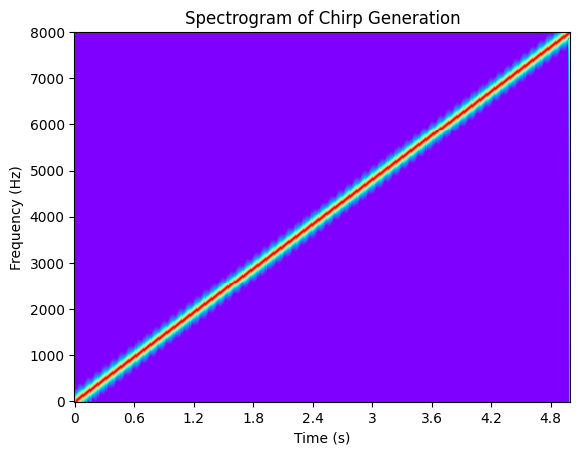

In [50]:
freq = librosa.amplitude_to_db(np.abs(librosa.stft(y_norm)), ref=np.max)
print(freq.shape)
librosa.display.specshow(freq, y_axis='linear', x_axis='time', sr=SAMPLE_RATE, cmap ='rainbow')
plt.axis(ymax=8000)
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Spectrogram of Chirp Generation')


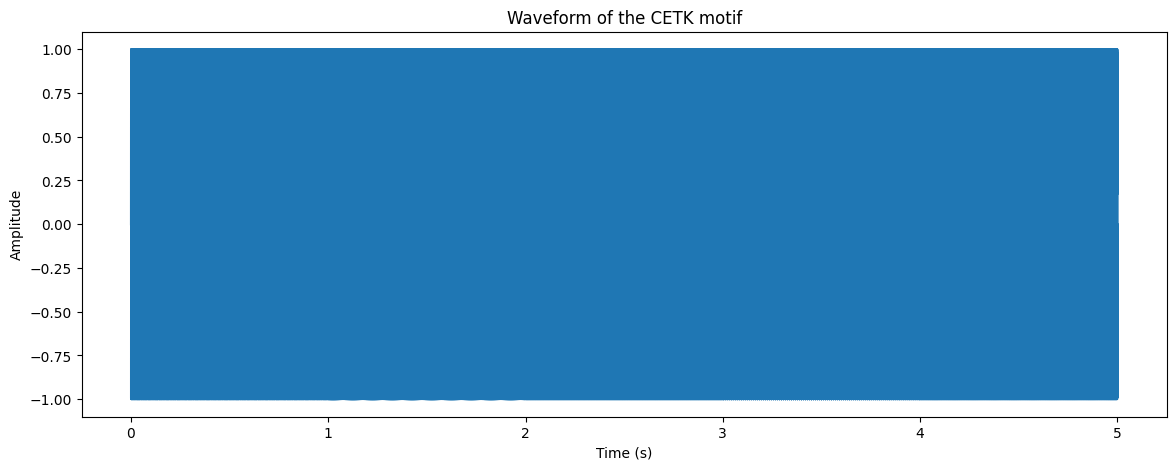

In [51]:
# 4. Some Fun with Sine Tone
SAMPLE_RATE = 44100  # Hertz
DURATION = 5  # Seconds


_, y1 = (generate_sine_wave(6000, SAMPLE_RATE, 1))
_, y2 = (generate_sine_wave(7000, SAMPLE_RATE, 1))
_, y3 = (generate_sine_wave(5000, SAMPLE_RATE, 1))
_, y4 = (generate_sine_wave(2000, SAMPLE_RATE, 1))
_, y5 = (generate_sine_wave(3000, SAMPLE_RATE, 1))
y = np.concatenate((y1,y2,y3,y4,y5), axis=None)

plt.figure(figsize=(14, 5))
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Waveform of the CETK motif')
plt.plot(x, y)
plt.show()

In [52]:
y_norm = np.float32(y)
wavfile.write(r"C:\Users\jlkbo\Documents\ECE\2312\Project 2\TeamJKBandJTM-cetk.wav",SAMPLE_RATE,y_norm)
ipd.Audio(x, 'TeamJKBandJTM-cetk.wav', rate=SAMPLE_RATE) # load a NumPy array

(1025, 431)


Text(0.5, 1.0, 'Spectrogram of the CETK motif')

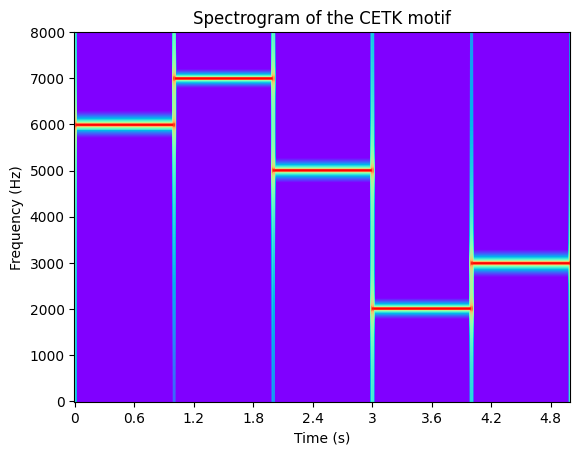

In [53]:
freq = librosa.amplitude_to_db(np.abs(librosa.stft(y_norm)), ref=np.max)
print(freq.shape)
librosa.display.specshow(freq, y_axis='linear', x_axis='time', sr=SAMPLE_RATE, cmap ='rainbow')
plt.axis(ymax=8000)
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Spectrogram of the CETK motif')

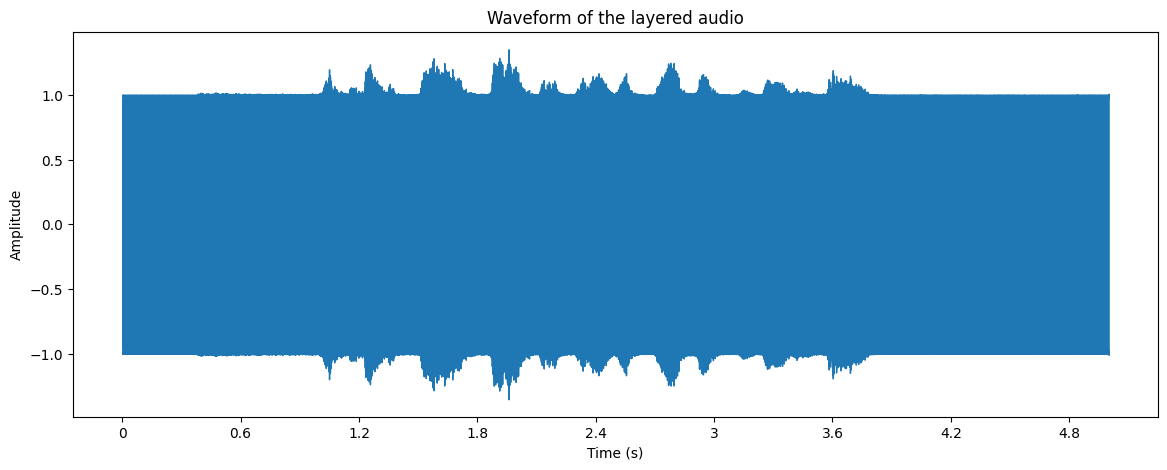

In [54]:
# 5. Combining Sound Files

sound_project1, sr = librosa.load(r'C:\Users\jlkbo\Documents\ECE\2312\Project 1\Project 1\sound1.wav')


sound_noise, _ =  librosa.load(r"C:\Users\jlkbo\Documents\ECE\2312\Project 2\TeamJKBandJTM-sinetone.wav")
mixed_noise = sound_project1 + sound_noise
wavfile.write(r"C:\Users\jlkbo\Documents\ECE\2312\Project 2\TeamJKBandJTM-speechsine.wav",sr,mixed_noise)

plt.figure(figsize=(14, 5))
librosa.display.waveshow(mixed_noise, sr=sr)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.title('Waveform of the layered audio')

ipd.Audio(x, 'TeamJKBandJTM-speechsine.wav', rate=sr)

(1025, 216)


Text(0.5, 1.0, 'Spectrogram of the layered audio')

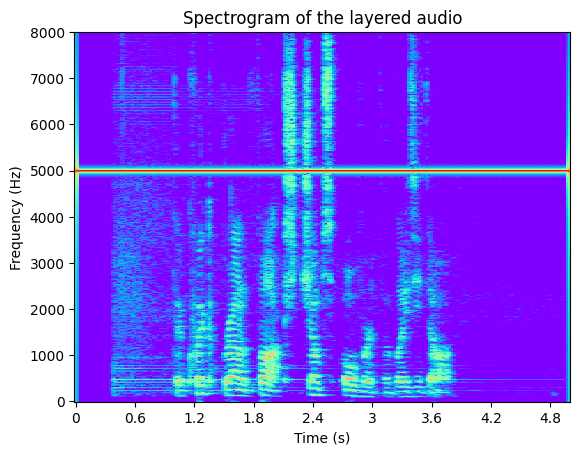

In [55]:
freq = librosa.amplitude_to_db(np.abs(librosa.stft(mixed_noise)), ref=np.max)
print(freq.shape)
librosa.display.specshow(freq, y_axis='linear', x_axis='time', sr=sr, cmap ='rainbow')
plt.axis(ymax=8000)
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Spectrogram of the layered audio')

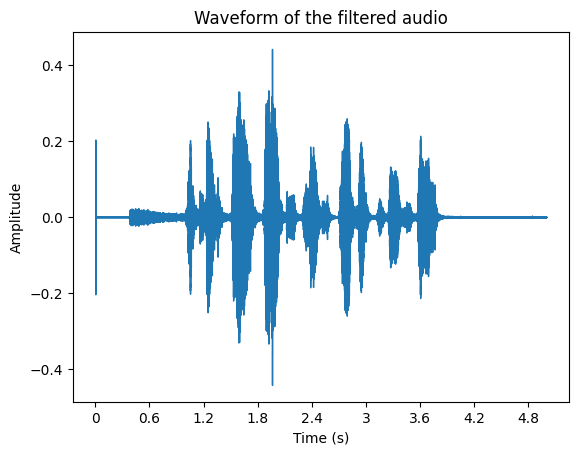

In [56]:
# 6. Speech and Audio Filtering

sos = signal.butter(20, 4000, 'lp', fs=sr, output='sos')

filtered = signal.sosfilt(sos, mixed_noise)

librosa.display.waveshow(filtered, sr=sr)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Waveform of the filtered audio')
wavfile.write(r"C:\Users\jlkbo\Documents\ECE\2312\Project 2\TeamJKBandJTM-filteredspeechsine.wav",sr,np.float32(filtered))
ipd.Audio(x, 'TeamJKBandJTM-filteredspeechsine.wav', rate=sr)

(1025, 216)


Text(0.5, 1.0, 'Spectrogram of the filtered audio')

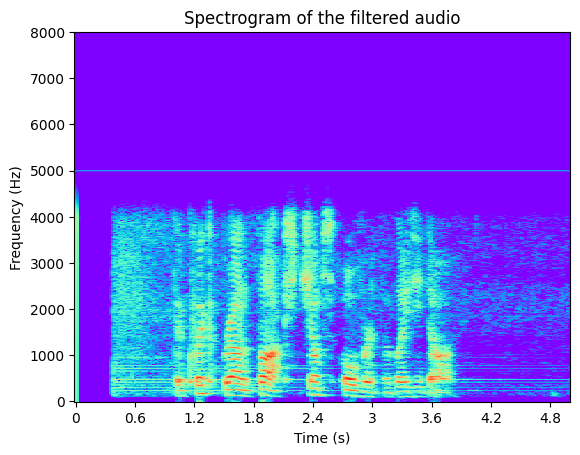

In [57]:
freq = librosa.amplitude_to_db(np.abs(librosa.stft(filtered)), ref=np.max)
print(freq.shape)
librosa.display.specshow(freq, y_axis='linear', x_axis='time', sr=sr, cmap ='rainbow')
plt.axis(ymax=8000)
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Spectrogram of the filtered audio')

[ 0.0000000e+00 -1.5258789e-05  0.0000000e+00 ...  1.3732910e-04
 -1.5258789e-04 -3.2043457e-04]
[ 0.13419116  0.95840937  0.3057136  ...  0.43128043 -0.88014114
 -0.5850587 ]
[[ 0.0000000e+00  1.3419116e-01]
 [-1.5258789e-05  9.5840937e-01]
 [ 0.0000000e+00  3.0571359e-01]
 ...
 [ 1.3732910e-04  4.3128043e-01]
 [-1.5258789e-04 -8.8014114e-01]
 [-3.2043457e-04 -5.8505869e-01]]


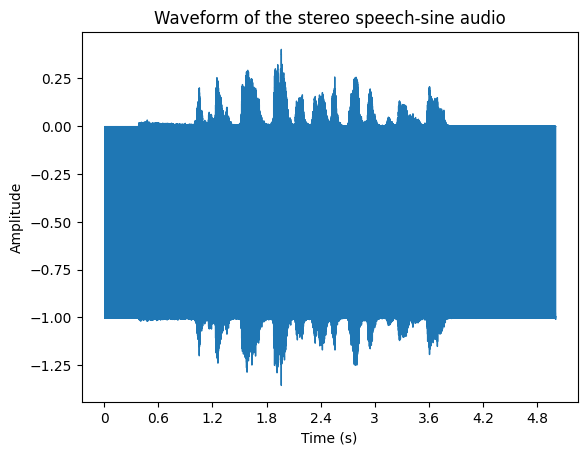

In [58]:
x_first = sound_project1
x_second = mixed_noise
new_stereo = np.vstack([x_first, x_second])
print(x_first)
print(x_second)
print(new_stereo.T)

librosa.display.waveshow(new_stereo, sr=sr)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Waveform of the stereo speech-sine audio')
write('teamJKBandJTM-stereospeechsine.wav',sr,new_stereo.T) #

ipd.Audio(x, 'TeamJKBandJTM-stereospeechsine.wav', rate=sr)



(1025, 216)


Text(0.5, 1.0, 'Spectrogram of the left-ear audio')

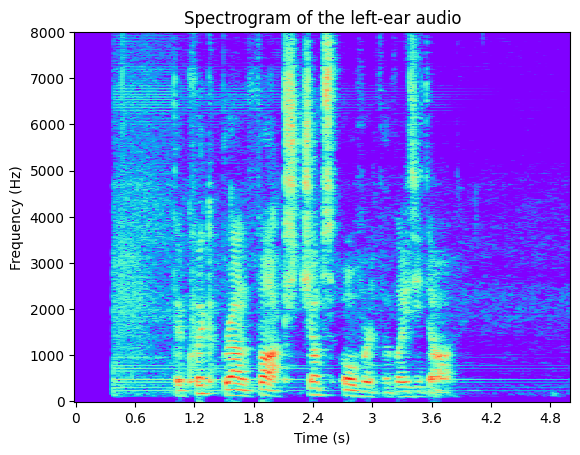

In [68]:
freq = librosa.amplitude_to_db(np.abs(librosa.stft(x_first)), ref=np.max)
print(freq.shape)
librosa.display.specshow(freq, y_axis='linear', x_axis='time', sr=sr, cmap ='rainbow')
plt.axis(ymax=8000)
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Spectrogram of the left-ear audio')



(1025, 216)


Text(0.5, 1.0, 'Spectrogram of the right-ear audio')

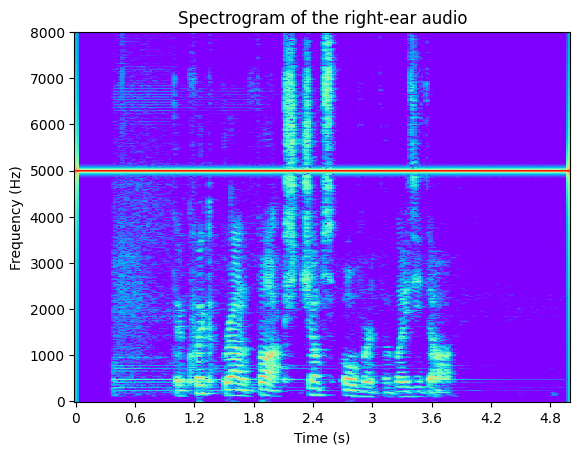

In [67]:
freq = librosa.amplitude_to_db(np.abs(librosa.stft(x_second)), ref=np.max)
print(freq.shape)
librosa.display.specshow(freq, y_axis='linear', x_axis='time', sr=sr, cmap ='rainbow')
plt.axis(ymax=8000)
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Spectrogram of the right-ear audio')